Training size: 916, Validation size: 196, Test size: 197
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 340ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 280ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 281ms/step
Extracted train features shape: (916, 4, 4, 2048)
Flattened train features shape: (916, 32768)
Reduced train features shape: (916, 100)


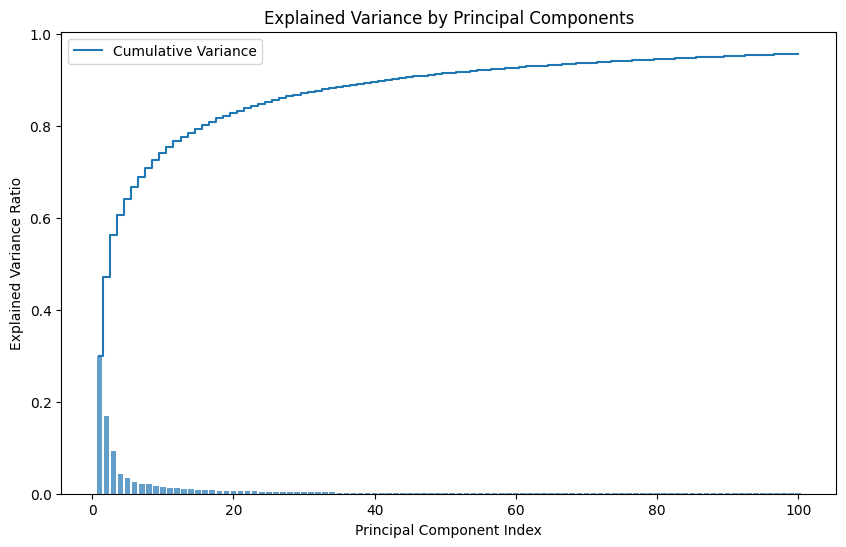

In [4]:
%run preprocessing.ipynb

In [7]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [8]:
# Assuming labels are integers, convert them to categorical (one-hot encoding)
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder to the labels and transform them
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

num_classes = len(label_encoder.classes_)

# num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
y_test = to_categorical(y_test, num_classes)

In [11]:
# Flatten the training, validation, and test data
X_train = X_train.reshape(X_train.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the model architecture
model = Sequential([
    Dense(512, activation='relu', input_shape=(49152,)),  # Input layer with shape of flattened features
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Output layer with number of classes
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/Users/birkstrandbjornaa/Documents/DatatekH24/it3212-data-driven-software/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Train the model
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    verbose=1)


Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.2052 - loss: 45.8033 - val_accuracy: 0.3776 - val_loss: 2.5966
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.2804 - loss: 6.3337 - val_accuracy: 0.3980 - val_loss: 1.5879
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.3308 - loss: 1.5918 - val_accuracy: 0.3827 - val_loss: 1.5667
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.3656 - loss: 1.5611 - val_accuracy: 0.3776 - val_loss: 1.5357
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.3692 - loss: 1.5789 - val_accuracy: 0.3827 - val_loss: 1.5091
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.3802 - loss: 1.5173 - val_accuracy: 0.3827 - val_loss: 1.4860
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.3205 - loss: 1.5069 - val_accuracy: 0.3827 - val_loss: 1.4684
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.3709 - loss: 1.4907 - val_accuracy: 0.3827 - 

In [14]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Test Accuracy: 40.61%


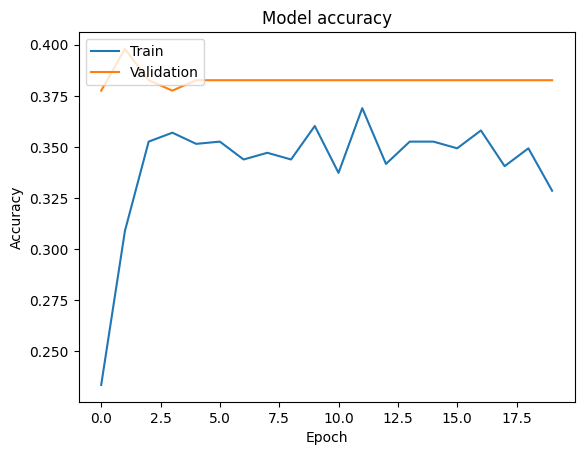

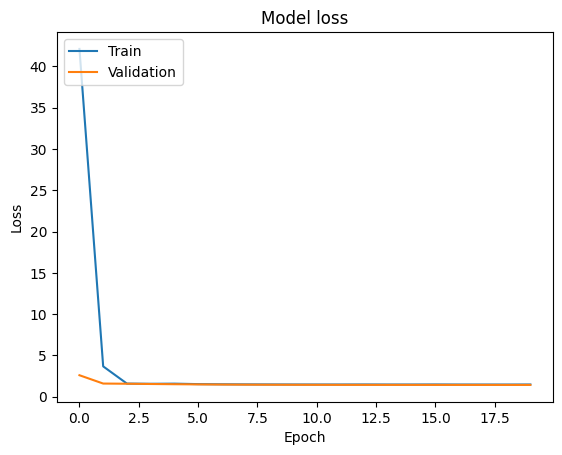

In [15]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()